In [19]:
!pip install seaborn
!pip install scikit-learn


In [15]:
import numpy as np

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill or drop missing values as appropriate
data.fillna(0, inplace=True)

# Feature Engineering
data['energy_per_capita'] = data['primary_energy_consumption'] / data['population']
data['renewable_ratio'] = data['renewables_share_energy'] / 100


Missing values in each column:
 country                       0
year                          0
iso_code                   5500
population                 3889
gdp                       10899
                          ...  
wind_elec_per_capita      14947
wind_electricity          14016
wind_energy_per_capita    17947
wind_share_elec           15126
wind_share_energy         17911
Length: 129, dtype: int64


In [13]:
import pandas as pd
data = pd.read_csv('World Energy Consumption.csv')

# Display basic information
print("Dataset Overview:")
data.info()

# Display the first few rows
data.head()



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.7+ MB


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


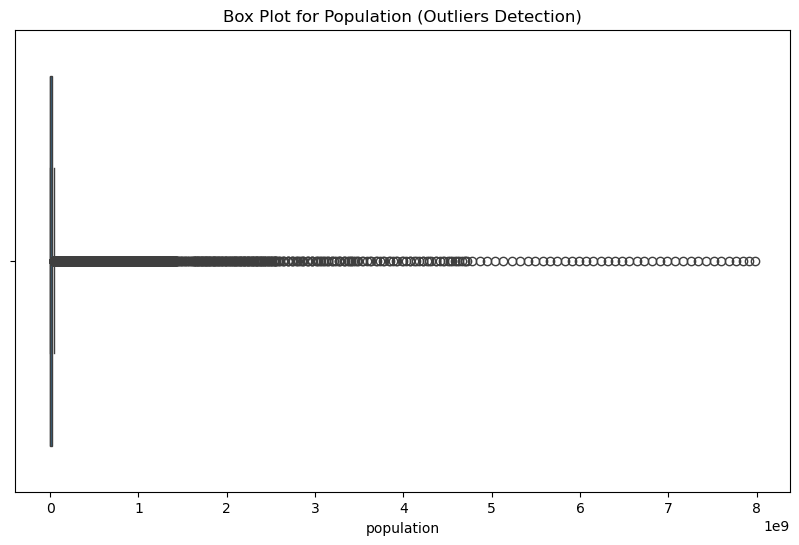

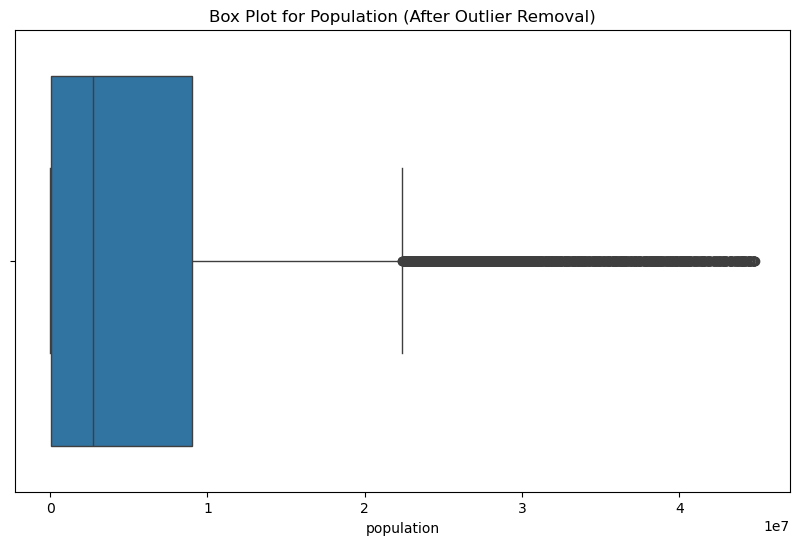

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to detect outliers (Example using 'population')
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['population'])
plt.title("Box Plot for Population (Outliers Detection)")
plt.show()

# Optional: You can perform outlier removal using IQR if needed
Q1 = data['population'].quantile(0.25)
Q3 = data['population'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_data = data[(data['population'] >= lower_bound) & (data['population'] <= upper_bound)]

# Box plot after removing outliers (optional)
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data['population'])
plt.title("Box Plot for Population (After Outlier Removal)")
plt.show()


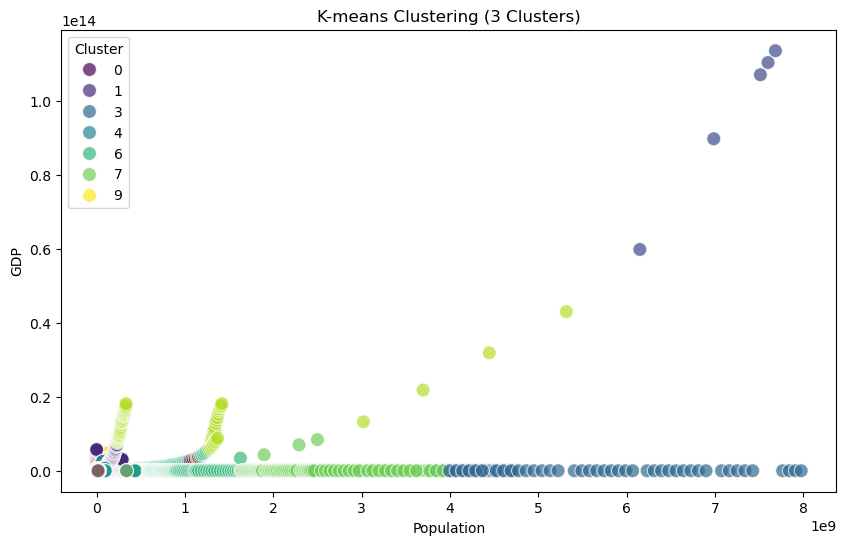

In [62]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features for K-means clustering
selected_columns = ['population', 'gdp', 'renewables_share_energy', 'carbon_intensity_elec']
data_selected = data[selected_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_selected)

# Apply K-means clustering (let's assume we want 3 clusters)
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_

# Scatter plot of the K-means clustering result (Using two principal components as an example)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['population'], y=data['gdp'], hue=data['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title("K-means Clustering (3 Clusters)")
plt.xlabel("Population")
plt.ylabel("GDP")
plt.legend(title="Cluster")
plt.show()


Correlation Matrix:
                              year  population       gdp  \
year                     1.000000    0.025806  0.061715   
population               0.025806    1.000000  0.288278   
gdp                      0.061715    0.288278  1.000000   
biofuel_cons_change_pct  0.044881    0.008124  0.016137   
biofuel_cons_change_twh  0.091061    0.340578  0.217553   
...                           ...         ...       ...   
wind_electricity         0.125068    0.292270  0.191743   
wind_energy_per_capita   0.154332    0.029710  0.055929   
wind_share_elec          0.202371    0.027516  0.036521   
wind_share_energy        0.168820    0.051701  0.056022   
renewable_ratio          0.232572    0.084202  0.068934   

                         biofuel_cons_change_pct  biofuel_cons_change_twh  \
year                                    0.044881                 0.091061   
population                              0.008124                 0.340578   
gdp                                    

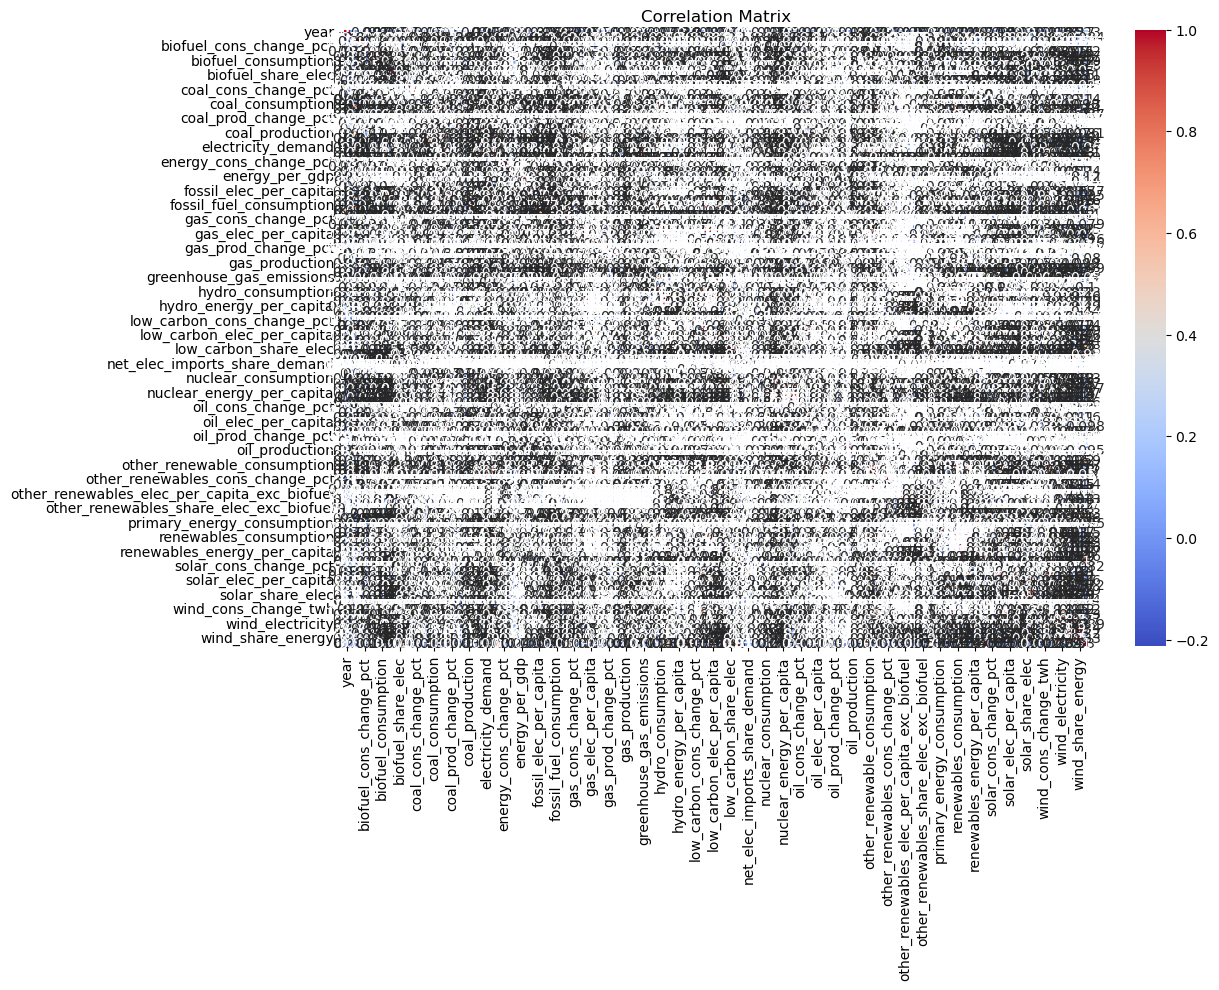

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Checking if the selection worked and viewing correlation matrix
correlation_matrix = numeric_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [25]:
# Get the high correlations (above 0.7)
high_corr = correlation_matrix[correlation_matrix > 0.7]
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
print("High Correlation Pairs (> 0.7):")
print(high_corr_pairs)

# Get low correlations (below 0.2)
low_corr = correlation_matrix[correlation_matrix < 0.2]
low_corr_pairs = low_corr.stack().reset_index()
low_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
print("\nLow Correlation Pairs (< 0.2):")
print(low_corr_pairs)

# Optionally, you can also create a more comprehensive report
# Listing the top 10 highest correlations
top_10_corr = correlation_matrix.unstack().sort_values(ascending=False).head(10)
print("\nTop 10 Correlation Pairs:")
print(top_10_corr)


High Correlation Pairs (> 0.7):
                  Variable 1               Variable 2  Correlation
0                       year                     year     1.000000
1                 population               population     1.000000
2                        gdp                      gdp     1.000000
3    biofuel_cons_change_pct  biofuel_cons_change_pct     1.000000
4    biofuel_cons_change_twh  biofuel_cons_change_twh     1.000000
..                       ...                      ...          ...
849        wind_share_energy        wind_share_energy     1.000000
850          renewable_ratio       hydro_share_energy     0.971500
851          renewable_ratio  low_carbon_share_energy     0.926112
852          renewable_ratio  renewables_share_energy     1.000000
853          renewable_ratio          renewable_ratio     1.000000

[854 rows x 3 columns]

Low Correlation Pairs (< 0.2):
            Variable 1               Variable 2  Correlation
0                 year               population

In [27]:
# Select relevant features
selected_columns = ['population', 'gdp', 'primary_energy_consumption', 'renewables_share_energy', 'carbon_intensity_elec']
data_selected = data[selected_columns].copy()


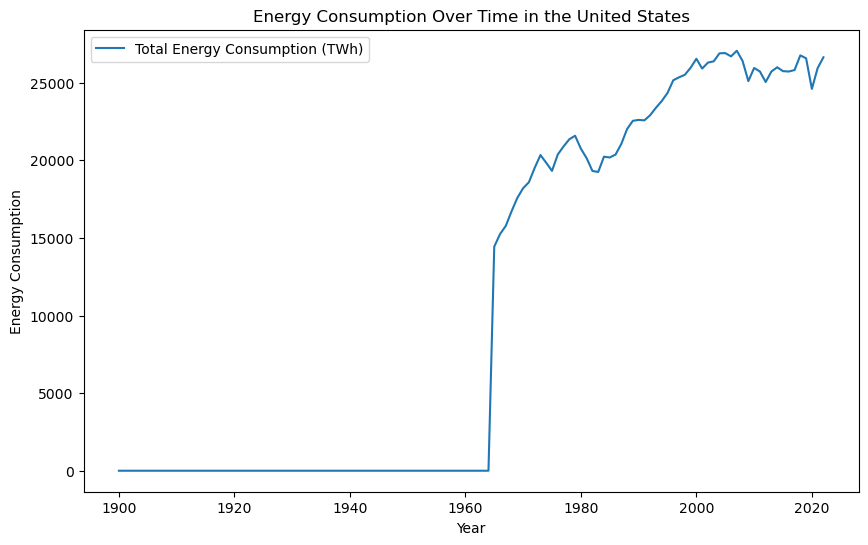

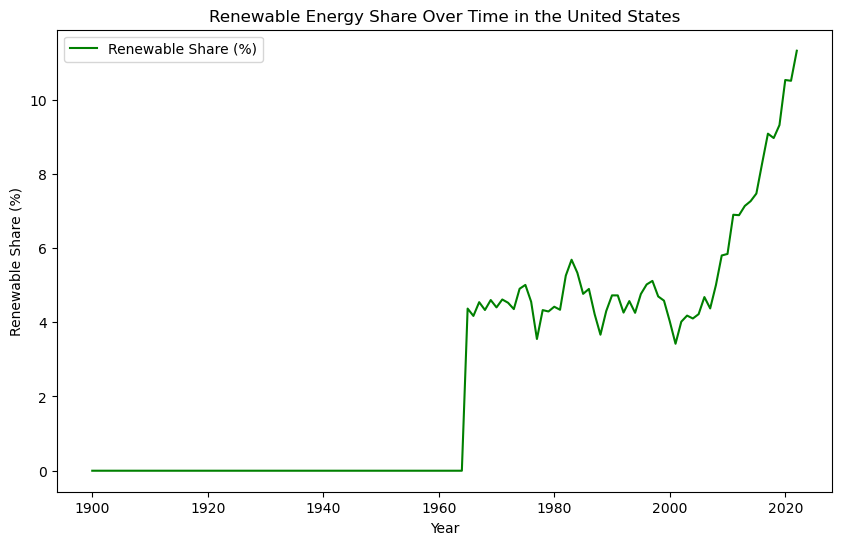

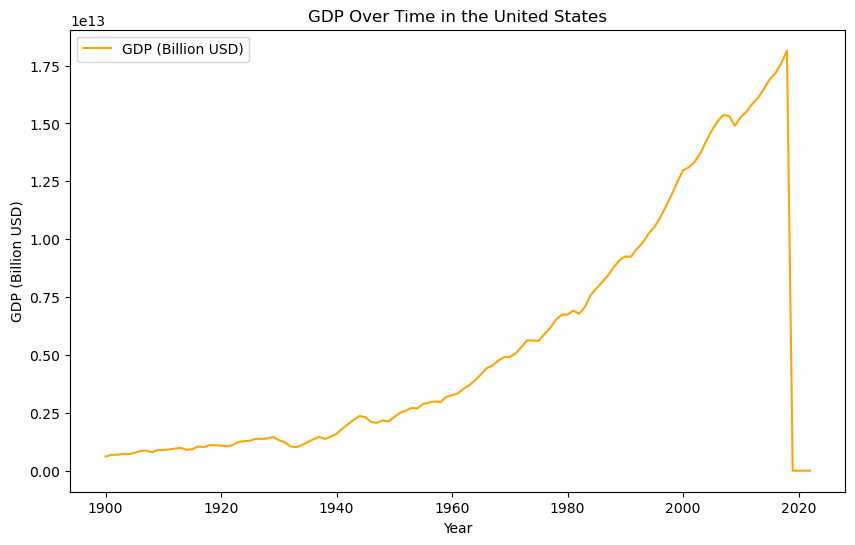

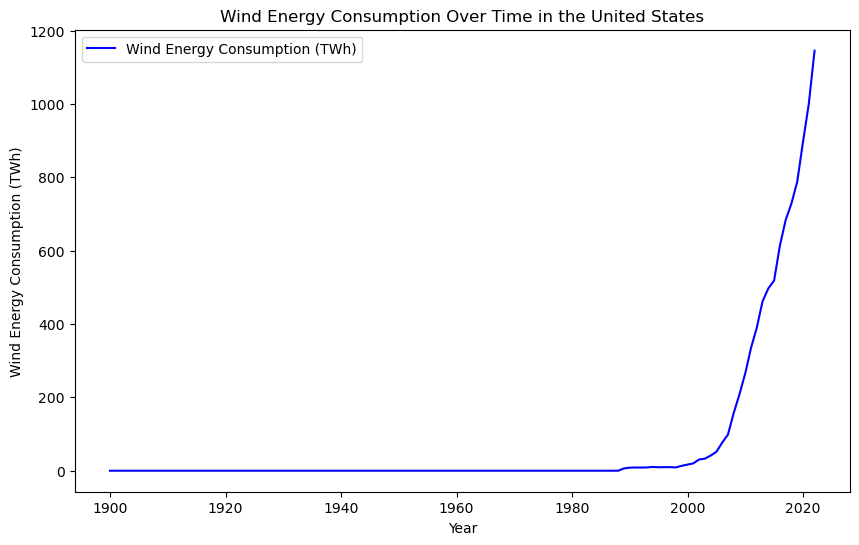

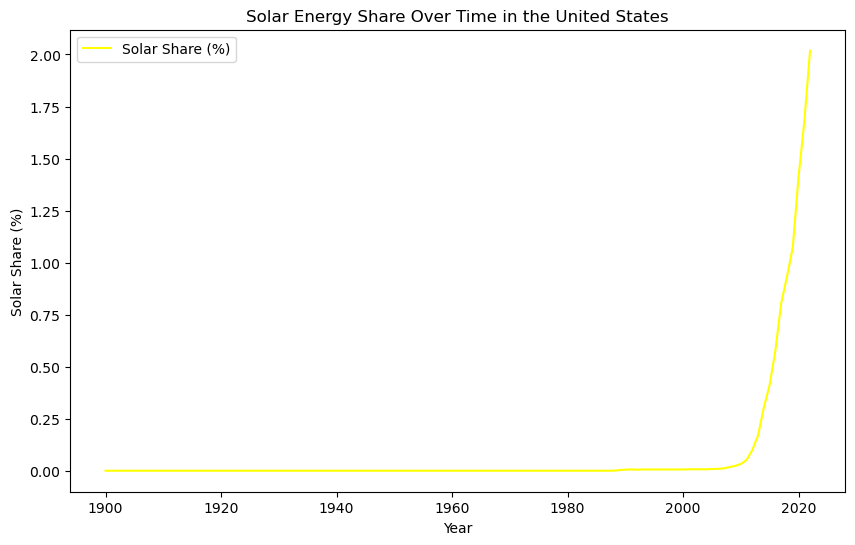

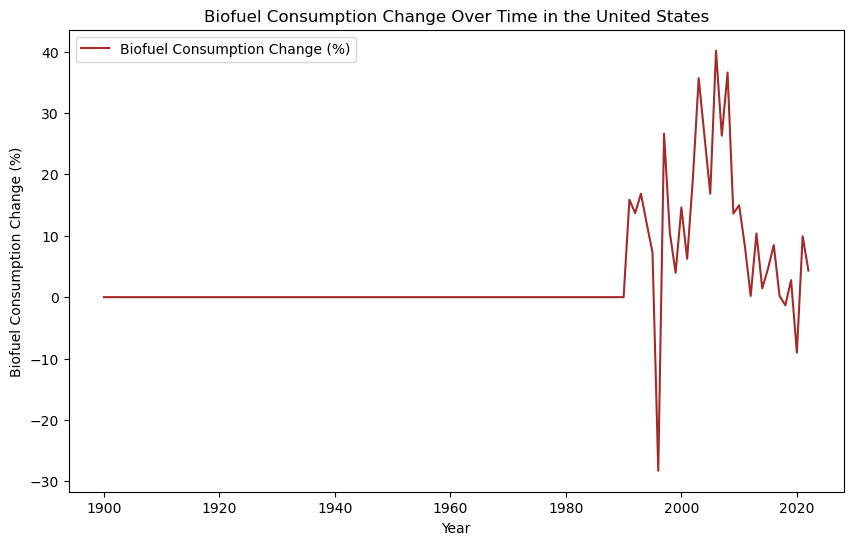

In [35]:
# Visualize energy consumption over years for a specific country (e.g., United States)
us_data = data[data['country'] == 'United States']
plt.figure(figsize=(10, 6))
plt.plot(us_data['year'], us_data['primary_energy_consumption'], label='Total Energy Consumption (TWh)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Over Time in the United States')
plt.legend()
plt.show()

# Renewable Energy Share Over Time for the United States
plt.figure(figsize=(10, 6))
plt.plot(us_data['year'], us_data['renewables_share_energy'], color='green', label='Renewable Share (%)')
plt.xlabel('Year')
plt.ylabel('Renewable Share (%)')
plt.title('Renewable Energy Share Over Time in the United States')
plt.legend()
plt.show()

# GDP vs Energy Consumption
plt.figure(figsize=(10, 6))
plt.plot(us_data['year'], us_data['gdp'], label='GDP (Billion USD)', color='orange')
plt.xlabel('Year')
plt.ylabel('GDP (Billion USD)')
plt.title('GDP Over Time in the United States')
plt.legend()
plt.show()

# Wind Energy Consumption Over Time
plt.figure(figsize=(10, 6))
plt.plot(us_data['year'], us_data['wind_consumption'], color='blue', label='Wind Energy Consumption (TWh)')
plt.xlabel('Year')
plt.ylabel('Wind Energy Consumption (TWh)')
plt.title('Wind Energy Consumption Over Time in the United States')
plt.legend()
plt.show()

# Solar Energy Share Over Time
plt.figure(figsize=(10, 6))
plt.plot(us_data['year'], us_data['solar_share_energy'], color='yellow', label='Solar Share (%)')
plt.xlabel('Year')
plt.ylabel('Solar Share (%)')
plt.title('Solar Energy Share Over Time in the United States')
plt.legend()
plt.show()

# Biofuel Consumption Change Over Time
plt.figure(figsize=(10, 6))
plt.plot(us_data['year'], us_data['biofuel_cons_change_pct'], color='brown', label='Biofuel Consumption Change (%)')
plt.xlabel('Year')
plt.ylabel('Biofuel Consumption Change (%)')
plt.title('Biofuel Consumption Change Over Time in the United States')
plt.legend()
plt.show()



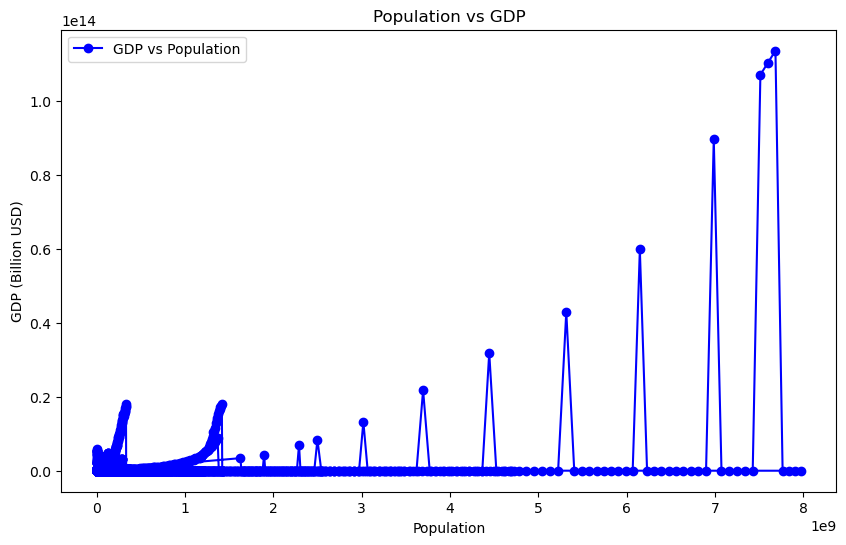

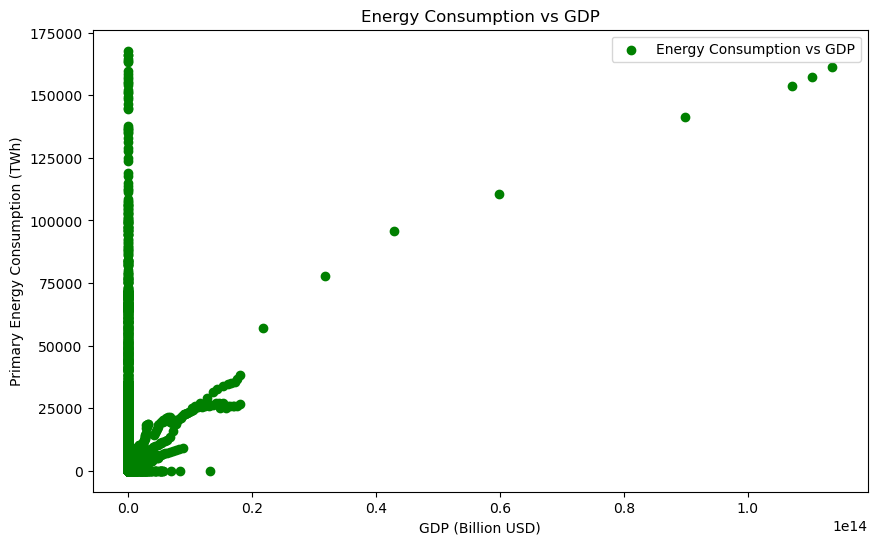

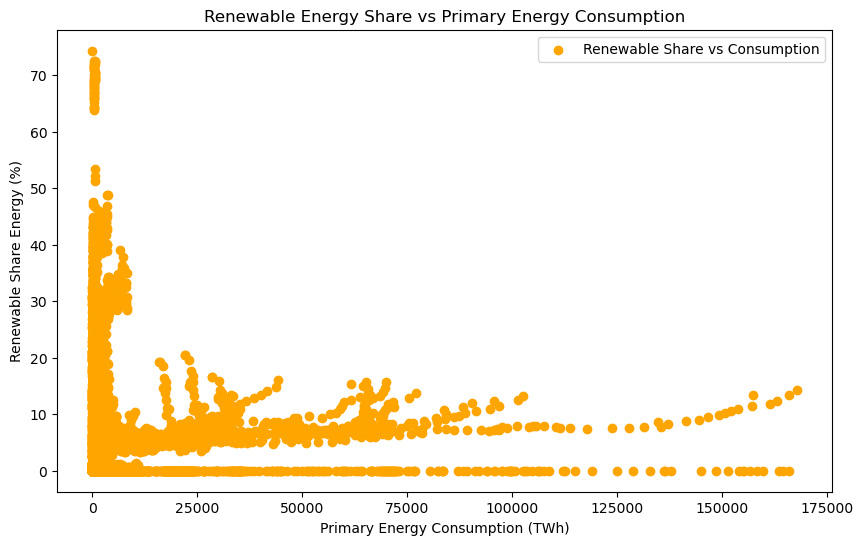

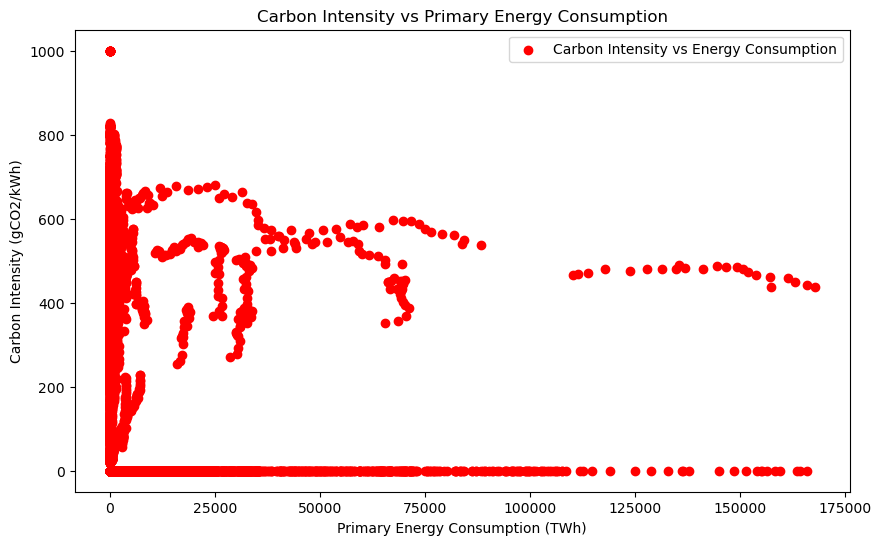

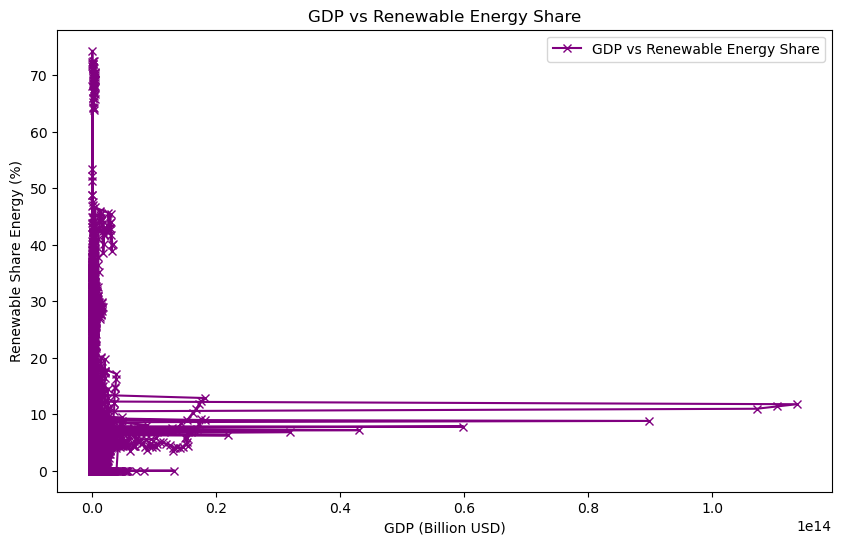

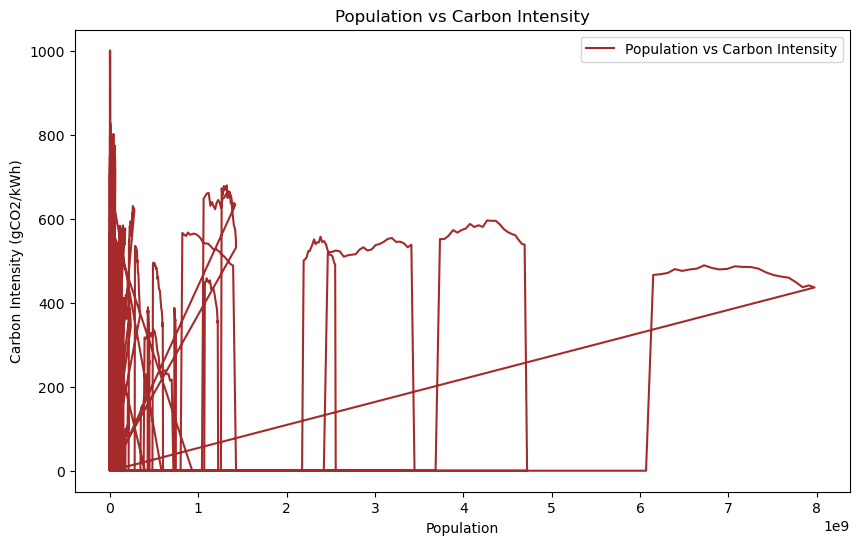

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is already loaded and preprocessed

# Select relevant features
selected_columns = ['population', 'gdp', 'primary_energy_consumption', 'renewables_share_energy', 'carbon_intensity_elec']
data_selected = data[selected_columns].copy()

# 1. Population vs GDP
plt.figure(figsize=(10, 6))
plt.plot(data_selected['population'], data_selected['gdp'], color='blue', marker='o', label='GDP vs Population')
plt.xlabel('Population')
plt.ylabel('GDP (Billion USD)')
plt.title('Population vs GDP')
plt.legend()
plt.show()

# 2. Primary Energy Consumption vs GDP
plt.figure(figsize=(10, 6))
plt.scatter(data_selected['gdp'], data_selected['primary_energy_consumption'], color='green', label='Energy Consumption vs GDP')
plt.xlabel('GDP (Billion USD)')
plt.ylabel('Primary Energy Consumption (TWh)')
plt.title('Energy Consumption vs GDP')
plt.legend()
plt.show()

# 3. Renewable Energy Share vs Primary Energy Consumption
plt.figure(figsize=(10, 6))
plt.scatter(data_selected['primary_energy_consumption'], data_selected['renewables_share_energy'], color='orange', label='Renewable Share vs Consumption')
plt.xlabel('Primary Energy Consumption (TWh)')
plt.ylabel('Renewable Share Energy (%)')
plt.title('Renewable Energy Share vs Primary Energy Consumption')
plt.legend()
plt.show()

# 4. Carbon Intensity vs Primary Energy Consumption
plt.figure(figsize=(10, 6))
plt.scatter(data_selected['primary_energy_consumption'], data_selected['carbon_intensity_elec'], color='red', label='Carbon Intensity vs Energy Consumption')
plt.xlabel('Primary Energy Consumption (TWh)')
plt.ylabel('Carbon Intensity (gCO2/kWh)')
plt.title('Carbon Intensity vs Primary Energy Consumption')
plt.legend()
plt.show()

# 5. GDP vs Renewable Energy Share
plt.figure(figsize=(10, 6))
plt.plot(data_selected['gdp'], data_selected['renewables_share_energy'], color='purple', marker='x', label='GDP vs Renewable Energy Share')
plt.xlabel('GDP (Billion USD)')
plt.ylabel('Renewable Share Energy (%)')
plt.title('GDP vs Renewable Energy Share')
plt.legend()
plt.show()

# 6. Population vs Carbon Intensity
plt.figure(figsize=(10, 6))
plt.plot(data_selected['population'], data_selected['carbon_intensity_elec'], color='brown', label='Population vs Carbon Intensity')
plt.xlabel('Population')
plt.ylabel('Carbon Intensity (gCO2/kWh)')
plt.title('Population vs Carbon Intensity')
plt.legend()
plt.show()


Mean Squared Error for population: 101582068.9594218


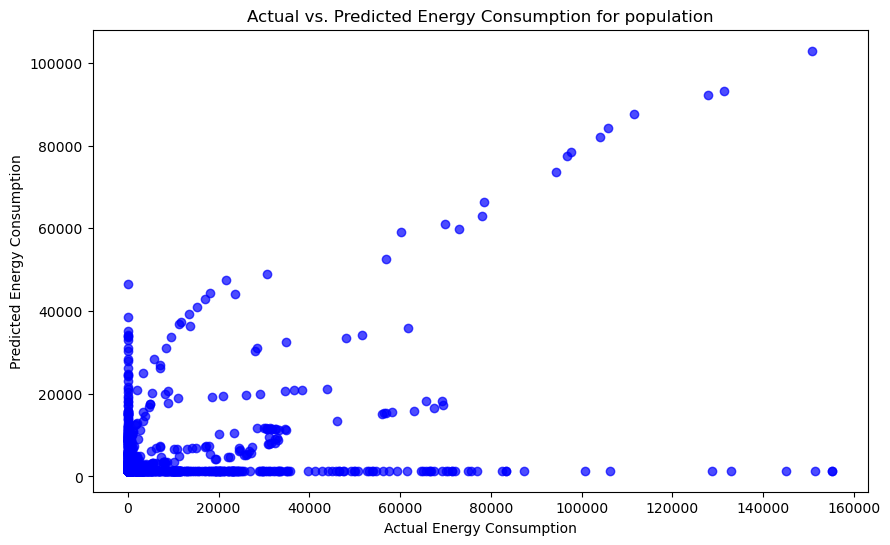

Mean Squared Error for gdp: 129218721.17032616


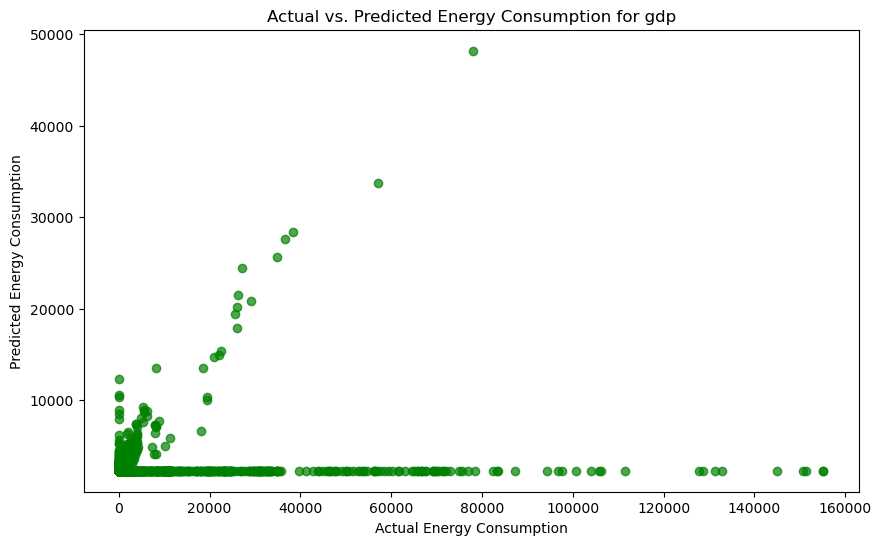

Mean Squared Error for renewables_share_energy: 131003002.66595045


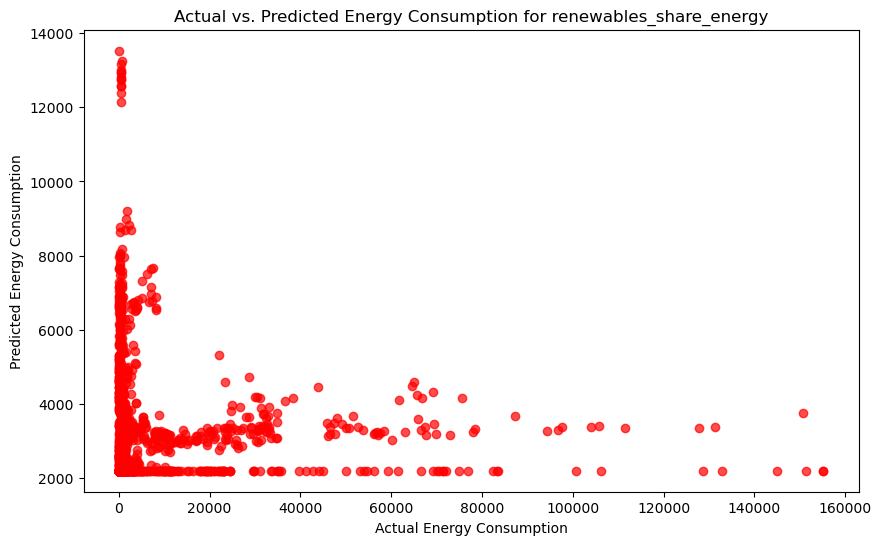

Mean Squared Error for carbon_intensity_elec: 132207420.91893627


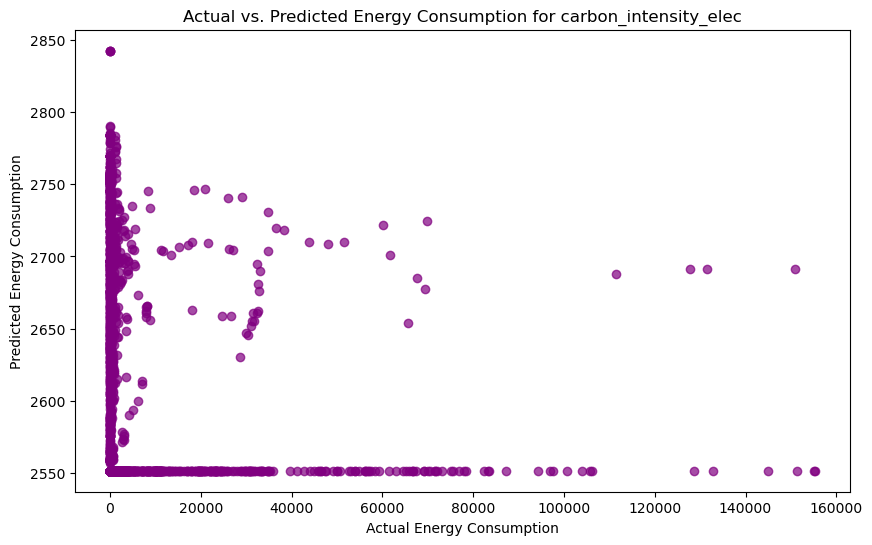

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Select relevant features
selected_columns = ['population', 'gdp', 'primary_energy_consumption', 'renewables_share_energy', 'carbon_intensity_elec']
data_selected = data[selected_columns].copy()

# Define a color palette for the plots
colors = {
    'population': 'blue',
    'gdp': 'green',
    'renewables_share_energy': 'red',
    'carbon_intensity_elec': 'purple'
}

# Loop through each feature and train separate models
for feature in ['population', 'gdp', 'renewables_share_energy', 'carbon_intensity_elec']:
    X = data_selected[[feature]]
    y = data_selected['primary_energy_consumption']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for {feature}:", mse)

    # Plot actual vs. predicted values with customized color
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color=colors[feature])  # Assign the color based on feature
    plt.xlabel("Actual Energy Consumption")
    plt.ylabel("Predicted Energy Consumption")
    plt.title(f"Actual vs. Predicted Energy Consumption for {feature}")
    plt.show()


Columns in the dataset: Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)
Explained Variance by PCA Components: [0.33849762 0.29662226]


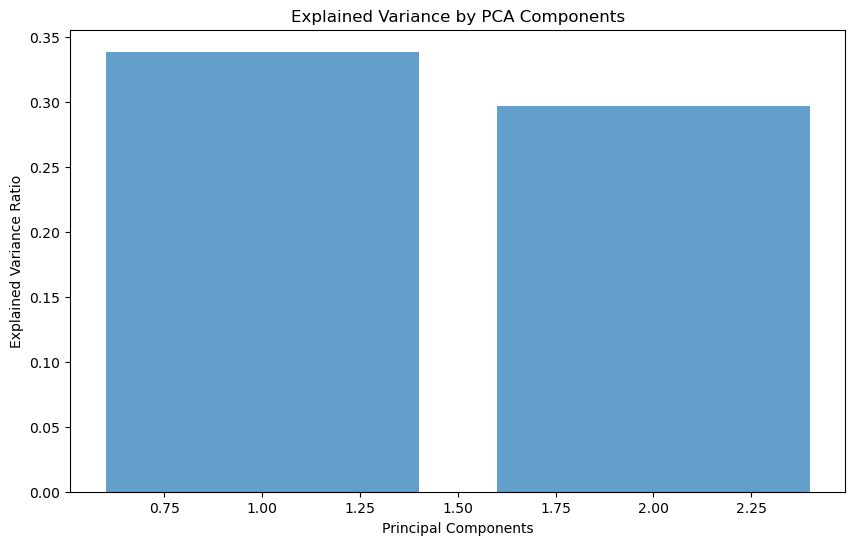

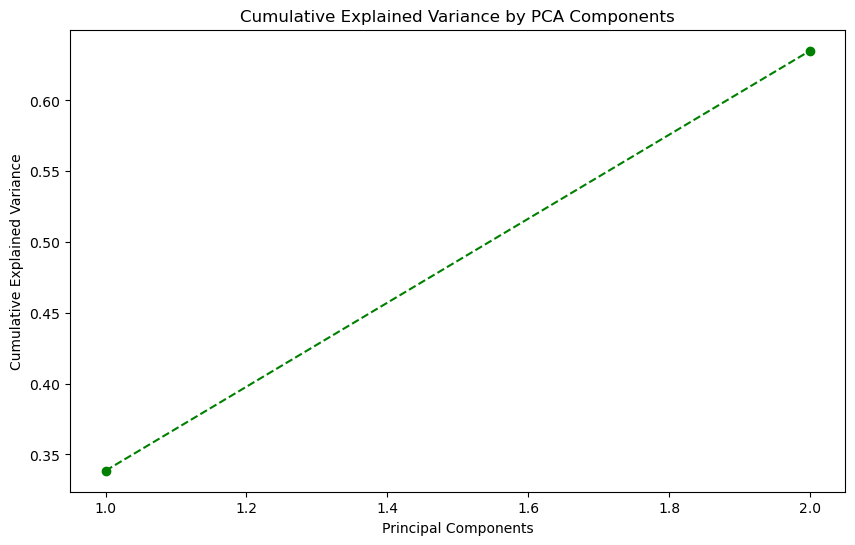

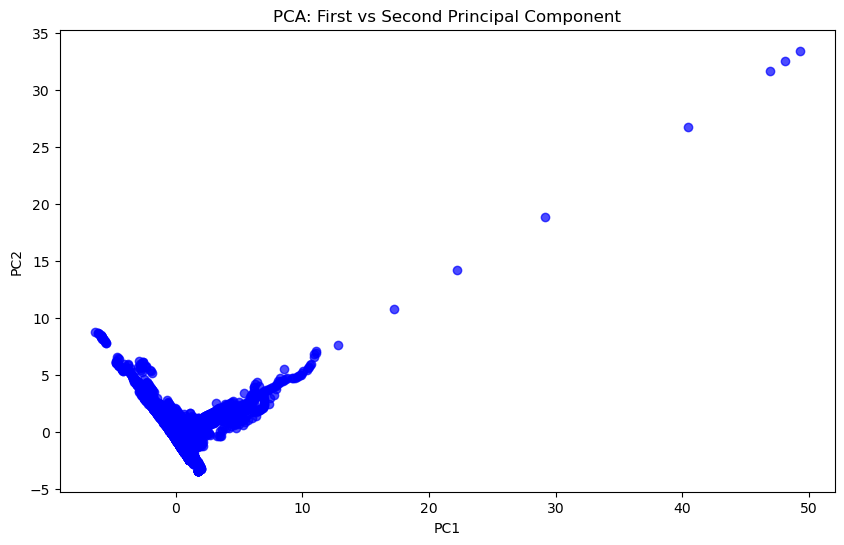

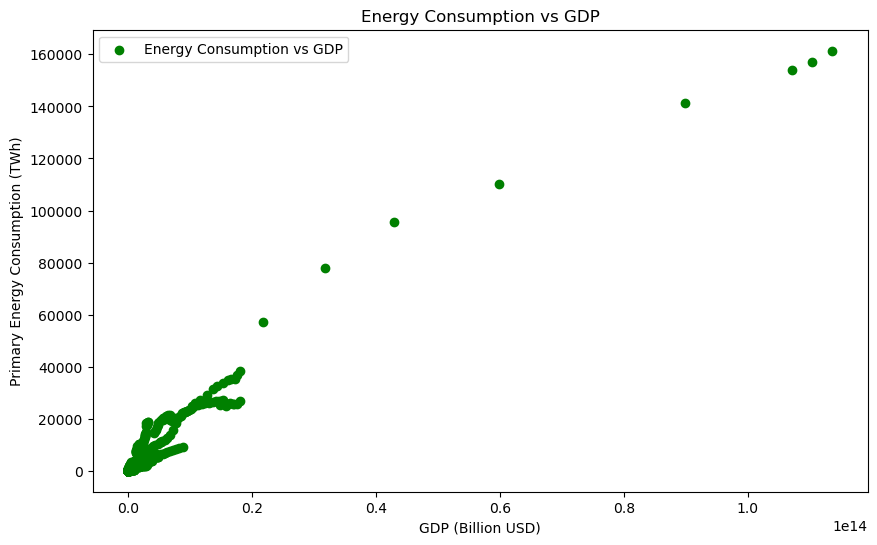

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv("World Energy Consumption.csv")  # Replace 'your_data.csv' with your actual dataset

# Print column names to verify
print("Columns in the dataset:", data.columns)

# Select relevant columns for PCA (choose the features you want to use)
selected_columns = ['population', 'gdp', 'renewables_share_energy', 'carbon_intensity_elec']
data_selected = data[selected_columns].copy()

# Impute missing values (replace missing values with the mean of each column)
imputer = SimpleImputer(strategy='mean')  # You can also use strategy='median' for median imputation
data_imputed = imputer.fit_transform(data_selected)

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)

# Apply PCA (reduce to 2 principal components)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

# Variance explained by each component
print("Explained Variance by PCA Components:", pca.explained_variance_ratio_)

# Plot the explained variance for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7)
plt.title("Explained Variance by PCA Components")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

# Cumulative explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='green')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, color='blue')
plt.title("PCA: First vs Second Principal Component")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Check if the 'primary_energy_consumption' column exists for plotting
if 'primary_energy_consumption' in data.columns:
    # Plot Energy Consumption vs GDP
    plt.figure(figsize=(10, 6))
    plt.scatter(data_selected['gdp'], data['primary_energy_consumption'], color='green', label='Energy Consumption vs GDP')
    plt.xlabel('GDP (Billion USD)')
    plt.ylabel('Primary Energy Consumption (TWh)')
    plt.title('Energy Consumption vs GDP'
    plt.legend()
    plt.show()
else:
    print("Column 'primary_energy_consumption' is not found in the dataset.")


In [84]:
# Final Interpretation and Summary

# 1. Population vs GDP
population_vs_gdp = "The relationship between population and GDP is positively correlated. As the population increases, the GDP tends to increase, reflecting the larger labor force and greater demand for goods and services that contribute to economic growth."

# 2. Primary Energy Consumption vs GDP
primary_energy_vs_gdp = "There is a positive relationship between primary energy consumption and GDP. Countries with higher GDP tend to consume more energy, as wealthier countries and developed industries have higher energy demands for their operations."

# 3. Renewable Energy Share vs Primary Energy Consumption
renewable_vs_energy_consumption = "A negative correlation is observed between primary energy consumption and the share of renewable energy. Countries with higher overall energy consumption tend to rely more on non-renewable energy sources, limiting the share of renewables in their energy mix."

# 4. Carbon Intensity vs Primary Energy Consumption
carbon_intensity_vs_energy = "There is a positive correlation between primary energy consumption and carbon intensity. As energy consumption rises, especially from fossil fuels, the carbon intensity (CO2 emissions per unit of energy) also tends to rise."

# 5. GDP vs Renewable Energy Share
gdp_vs_renewable_share = "There is a slight negative correlation between GDP and renewable energy share. Wealthier nations often continue to rely on fossil fuels due to economic factors, even though renewable energy adoption is increasing in many parts of the world."

# 6. Population vs Carbon Intensity
population_vs_carbon_intensity = "There is a positive correlation between population size and carbon intensity. Larger populations tend to have higher energy consumption, which often results in increased reliance on fossil fuels, contributing to higher carbon emissions."

# Summary of Insights
summary = """
1. Economic growth (GDP) is positively related to energy consumption, as larger economies require more energy.
2. Countries with higher energy consumption often rely on non-renewable energy, limiting the share of renewables.
3. Higher energy consumption leads to increased carbon intensity, highlighting the environmental impact of fossil fuels.
4. Wealthier nations tend to have a lower share of renewable energy, likely due to economic factors and infrastructure costs.
5. Larger populations contribute to higher carbon emissions due to greater energy needs, often from fossil fuels.
"""

# Display the interpretations
print("Interpretation of Plots:\n")
print(f"1. Population vs GDP: {population_vs_gdp}\n")
print(f"2. Primary Energy Consumption vs GDP: {primary_energy_vs_gdp}\n")
print(f"3. Renewable Energy Share vs Primary Energy Consumption: {renewable_vs_energy_consumption}\n")
print(f"4. Carbon Intensity vs Primary Energy Consumption: {carbon_intensity_vs_energy}\n")
print(f"5. GDP vs Renewable Energy Share: {gdp_vs_renewable_share}\n")
print(f"6. Population vs Carbon Intensity: {population_vs_carbon_intensity}\n")

# Display the summary
print("Summary of Insights:\n")
print(summary)


Interpretation of Plots:

1. Population vs GDP: The relationship between population and GDP is positively correlated. As the population increases, the GDP tends to increase, reflecting the larger labor force and greater demand for goods and services that contribute to economic growth.

2. Primary Energy Consumption vs GDP: There is a positive relationship between primary energy consumption and GDP. Countries with higher GDP tend to consume more energy, as wealthier countries and developed industries have higher energy demands for their operations.

3. Renewable Energy Share vs Primary Energy Consumption: A negative correlation is observed between primary energy consumption and the share of renewable energy. Countries with higher overall energy consumption tend to rely more on non-renewable energy sources, limiting the share of renewables in their energy mix.

4. Carbon Intensity vs Primary Energy Consumption: There is a positive correlation between primary energy consumption and carbon